In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('insurance.csv')

print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
# Função para variáveis numéricas
def tabela_numerica(df, variable):
    media = round(df[variable].mean(),2)
    desv = round(df[variable].std(),2)
    mediana = round(df[variable].median(),2)
    min = round(df[variable].min(),2)
    max = round(df[variable].max(),2)
    quantil = round(df[variable].quantile([0.25, 0.5, 0.75]),2)
    iqr = round(quantil[0.75] - quantil[0.25],2)

    
    tabela_num = pd.DataFrame({
        'Variável': [variable],
        'Média': [media],
        'DP': [desv],
        'Mediana': [mediana],
        'Mín': [min],
        'Máx': [max],
        'IQR': [iqr],
        'Frequência': ['-'], 
        'Percentual (%)': ['-']
    })
    return tabela_num

# Função para variáveis categóricas
def tabela_frequencia(df, variavel):
    frequencia = df[variavel].value_counts()
    percentual = df[variavel].value_counts(normalize=True).round(4) * 100
    nulos = df[variavel].isnull().sum() #nulos

    tabela_freq = pd.DataFrame({
        'Frequência': frequencia,
        'Percentual (%)': percentual
    })
    tabela_freq['Variável'] = variavel  # Adiciona a coluna 'Variável' para cada variável categórica
    tabela_freq = tabela_freq.reset_index()  # Reseta o índice para transformar as subcategorias em coluna
    tabela_freq.columns = ['Subcategoria', 'Frequência', 'Percentual (%)', 'Variável'] 
    return tabela_freq

# Função para gerar as tabelas com base no tipo da variável
def gerar_tabelas(df):
    tabelas = []  # Lista para armazenar as tabelas geradas
    
    for coluna in df.columns:
        if df[coluna].dtype in ['object', 'category']:  # Variáveis categóricas
            tabela = tabela_frequencia(df, coluna)
            tabelas.append(tabela)
        elif pd.api.types.is_numeric_dtype(df[coluna]):  # Variáveis numéricas
            tabela = tabela_numerica(df, coluna)
            tabelas.append(tabela)
    
    # Concatenando todas as tabelas em um único dataframe
    tabela_final = pd.concat(tabelas, ignore_index=True, sort=False)
    
    # Substituindo NaN por '-' nas colunas de 'Frequência' e 'Percentual (%)'
    #tabela_final[['Frequência', 'Percentual (%)']] = tabela_final[['Frequência', 'Percentual (%)']].fillna('-')
    tabela_final = pd.concat(tabelas, ignore_index=True, sort=False)


    tabela_final = tabela_final.fillna('-')
    colunas = ['Variável', 'Subcategoria', 'Frequência', 'Percentual (%)'] + [col for col in tabela_final.columns if col not in ['Variável', 'Subcategoria', 'Frequência', 'Percentual (%)']]
    tabela_final = tabela_final[colunas]


    return tabela_final



In [4]:
gerar_tabelas(df)

,Variável,Subcategoria,Frequência,Percentual (%),Média,DP,Mediana,Mín,Máx,IQR
0,age,-,-,-,39.21,14.05,39.0,18.0,64.0,24.0
1,sex,male,676,50.52,-,-,-,-,-,-
2,sex,female,662,49.48,-,-,-,-,-,-
3,bmi,-,-,-,30.66,6.1,30.4,15.96,53.13,8.39
4,children,-,-,-,1.09,1.21,1.0,0.0,5.0,2.0
5,smoker,no,1064,79.52,-,-,-,-,-,-
6,smoker,yes,274,20.48,-,-,-,-,-,-
7,region,southeast,364,27.2,-,-,-,-,-,-
8,region,southwest,325,24.29,-,-,-,-,-,-
9,region,northwest,325,24.29,-,-,-,-,-,-


In [5]:
def grafico(df):
    for coluna in df.columns:  # Itera por cada coluna no DataFrame        
        
        # Verifica se a coluna é categórica (nominal)
        if df[coluna].dtype in ['object', 'category']:  
            sns.countplot(x=df[coluna], palette='viridis')  
            plt.title(f'Distribuição de {coluna}', fontsize=16)
            plt.xlabel(coluna, fontsize=12)
            plt.ylabel('Frequência', fontsize=12)
        
        # Verifica se a coluna é numérica
        elif pd.api.types.is_numeric_dtype(df[coluna]):  
            sns.histplot(x=df[coluna], palette='viridis') 
            plt.title(f'Histograma de {coluna}', fontsize=16)
            plt.xlabel(coluna, fontsize=12)

        plt.show() 


C:\Users\Fifi\AppData\Local\Temp\ipykernel_12872\3697681730.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[coluna], palette='viridis')


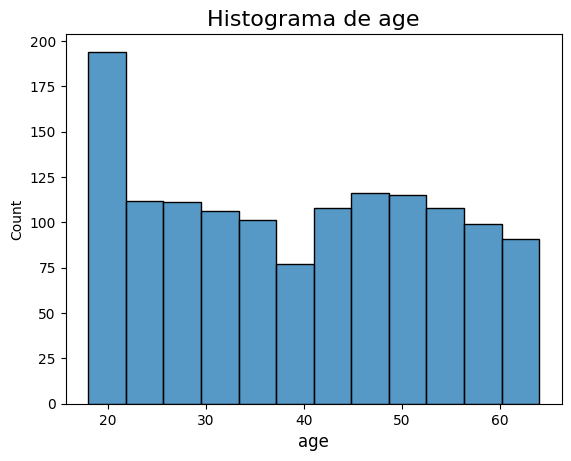

C:\Users\Fifi\AppData\Local\Temp\ipykernel_12872\3697681730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[coluna], palette='viridis')


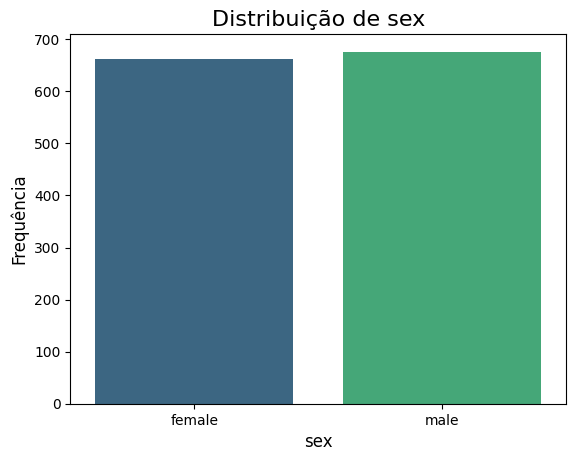

C:\Users\Fifi\AppData\Local\Temp\ipykernel_12872\3697681730.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[coluna], palette='viridis')


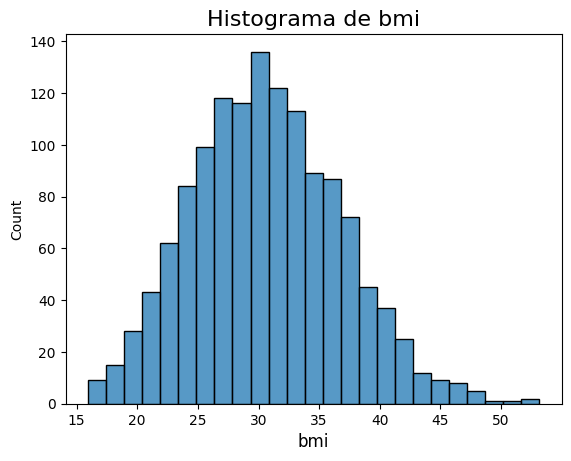

C:\Users\Fifi\AppData\Local\Temp\ipykernel_12872\3697681730.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[coluna], palette='viridis')


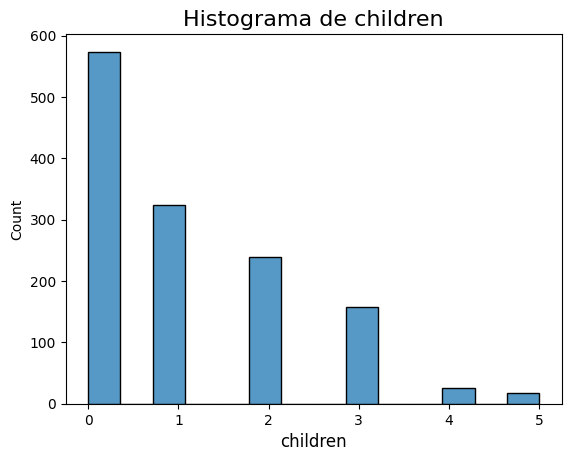

C:\Users\Fifi\AppData\Local\Temp\ipykernel_12872\3697681730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[coluna], palette='viridis')


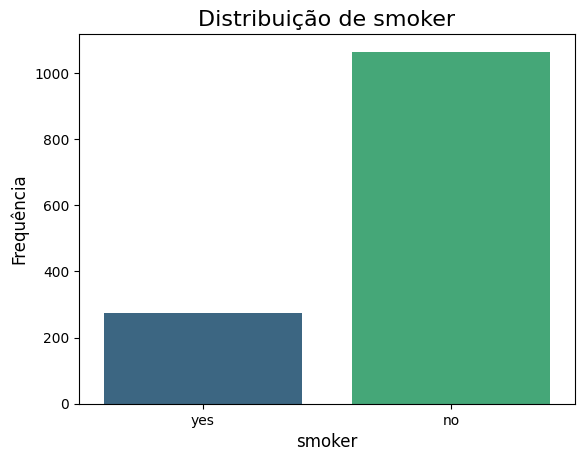

C:\Users\Fifi\AppData\Local\Temp\ipykernel_12872\3697681730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[coluna], palette='viridis')


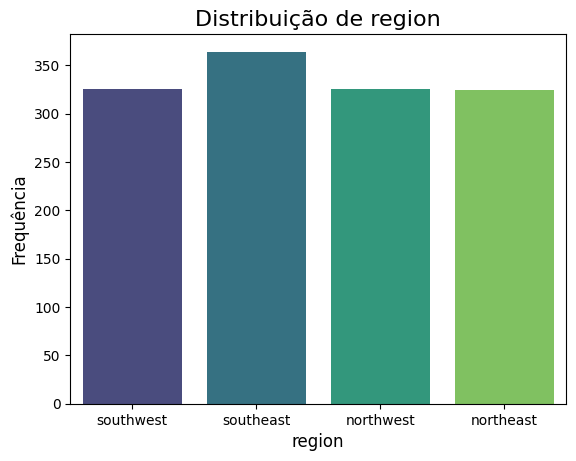

C:\Users\Fifi\AppData\Local\Temp\ipykernel_12872\3697681730.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[coluna], palette='viridis')


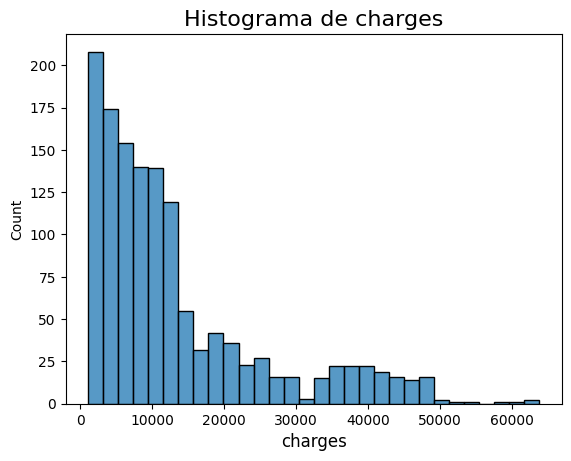

In [6]:
grafico(df)

Análise personalizada das variáveis

Hipótese 1: Existe uma correlação significativa entre a quantidade de filhos e o valor das taxas
Hipótese 2: Existe uma correlação significativa entre o valor do BMI e o valor das taxas
Hipótese 3: Existe uma correlação significativa entre a idade e o valor das taxas
Hipótese 4: Existe uma diferença significativa entre as taxas pagas por fumantes não fumantes
Hipótese 5: As taxas pagas por residentes em uma determinada região são diferentes

Correlação (charges e age): 0.534392133771846
P-valor (charges e age): 1.1306920278035412e-99
Correlação (charges e children): 0.13333894319168219
P-valor (charges e children): 9.846806132997262e-07
Correlação (charges e bmi): 0.11939590358331147
P-valor (charges e bmi): 1.1926059544526826e-05


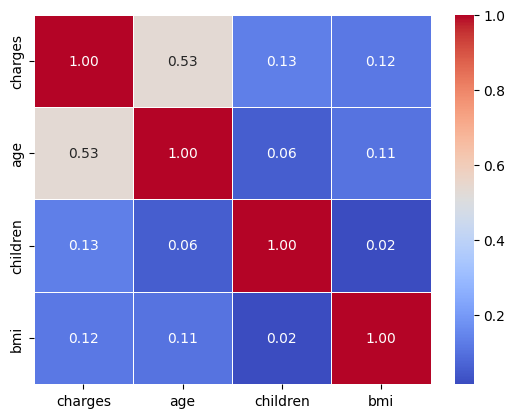

In [7]:
#Hipótese 1,2 e 3
df_corr = df[['charges', 'age', 'children', 'bmi']]

matriz = df_corr.corr(method='spearman')

sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


age_corr_value, age_p_value = stats.spearmanr(df_corr['charges'], df_corr['age'])
children_corr_value, children_p_value = stats.spearmanr(df_corr['charges'], df_corr['children'])
bmi_corr_value, bmi_p_value = stats.spearmanr(df_corr['charges'], df_corr['bmi'])

# resultados das correlações e p-valor
print("Correlação (charges e age):", age_corr_value)
print("P-valor (charges e age):", age_p_value)

print("Correlação (charges e children):", children_corr_value)
print("P-valor (charges e children):", children_p_value)

print("Correlação (charges e bmi):", bmi_corr_value)
print("P-valor (charges e bmi):", bmi_p_value)


Visualização dessas correlações

<Axes: xlabel='children', ylabel='charges'>

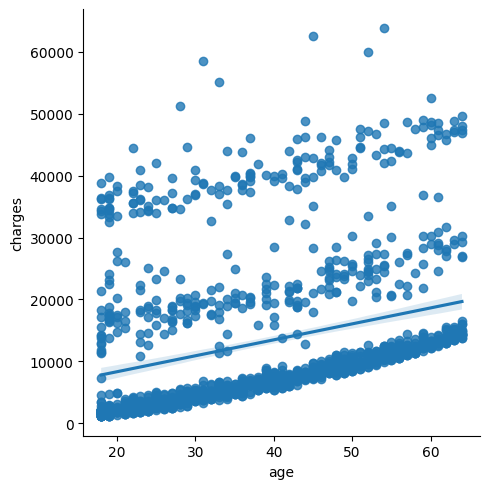

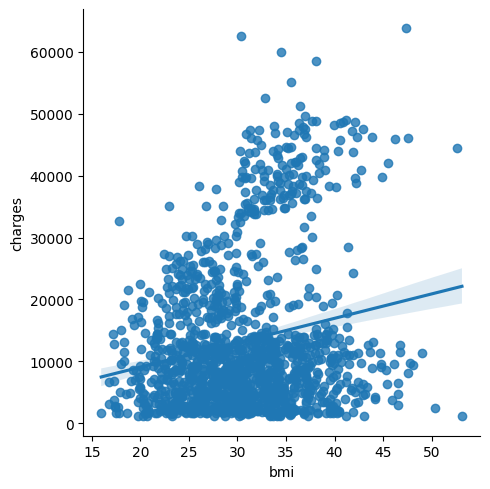

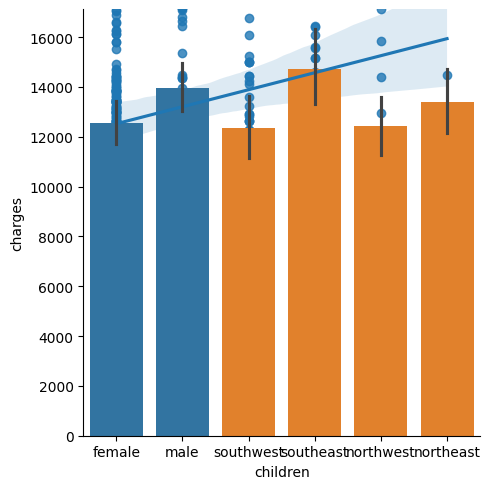

In [8]:
sns.lmplot(x = 'age', y = 'charges', data=df)

sns.lmplot(x = 'bmi', y = 'charges', data=df)

sns.lmplot(x = 'children', y = 'charges', data=df)

sns.barplot(x='sex', y='charges', data=df)

sns.barplot(x='region', y='charges', data=df)


Os gráficos acima deixam claro que não apenas as variáveis número de filhos, bmi e idade explicam o aumento das taxas.

As correlações são baixas, porém significativas. Os gráficos parecem indicar uma divisão de grupos. Cada qual com seu grau de correlação.

Existe ainda outras variáveis influenciando a distribuição dos dados. Isso poderia ser testado por um teste de Correlação Parcial.

Vamos verificar as taxas cobradas apenas para fumantes e por região...(Hipótese 4 e 5)


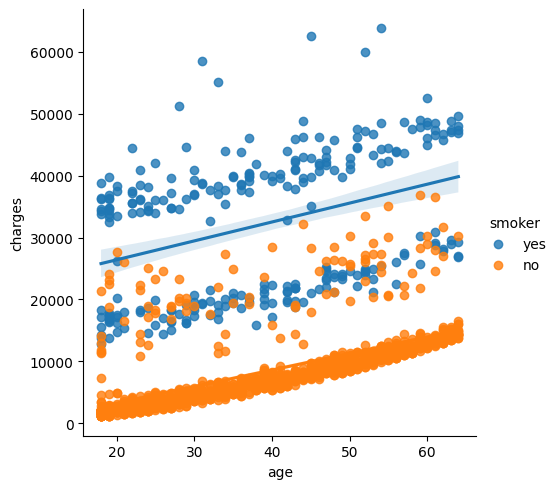

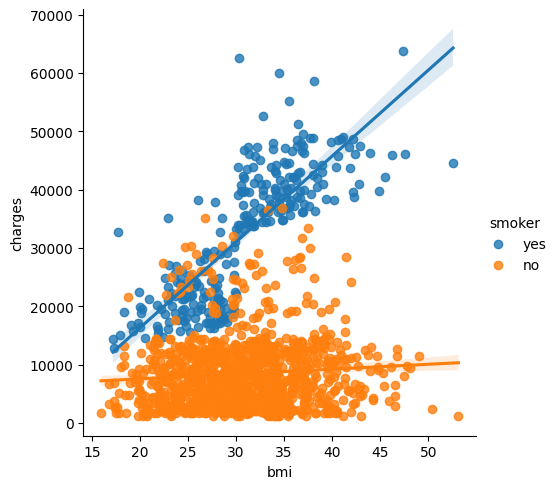

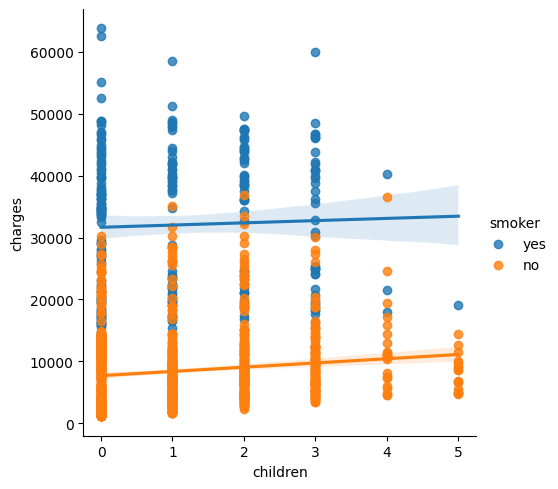

In [9]:
sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker')

sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker')

sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker')




Com a divisão entre fumantes e não fumantes, podemos confirmar que o fumantes possuem taxas mais altas e a correlação com as variáveis bmi, idade e qtd de filhos é diferenciada nesse grupos. Pode-se considerar as características desse grupo: Fumantes possuem maior tendência para sobrepeso e hábitos menos saudáveis. O que poderia fazer com que as taxas do seguro de saúde aumentasse

Vamos avaliar a média das taxas do seguro para os grupos fumantes e não fumantes

<Axes: xlabel='smoker', ylabel='charges'>

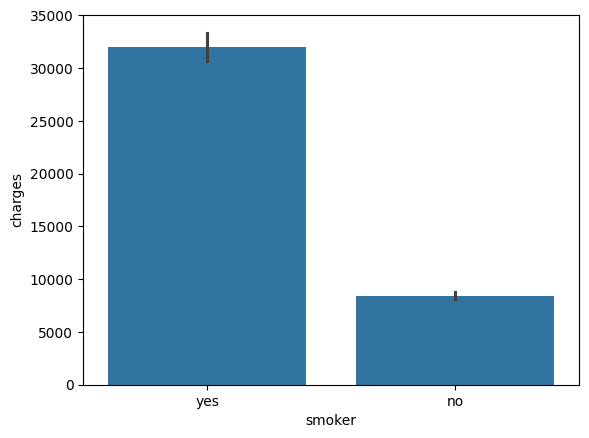

In [10]:
sns.barplot(x = 'smoker', y = 'charges', data=df)


<Axes: xlabel='sex', ylabel='charges'>

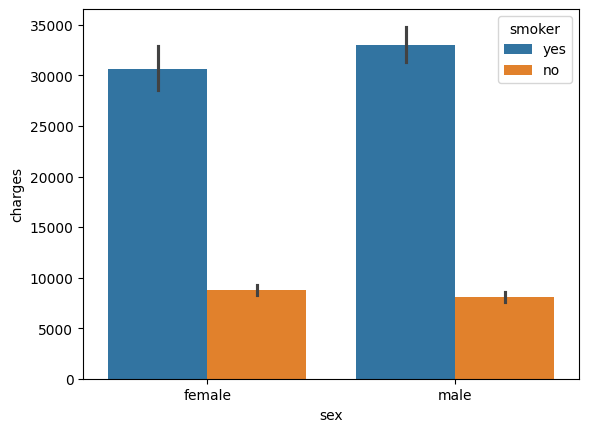

In [11]:
sns.barplot(x='sex', y='charges', hue='smoker', data=df)

<Axes: xlabel='region', ylabel='charges'>

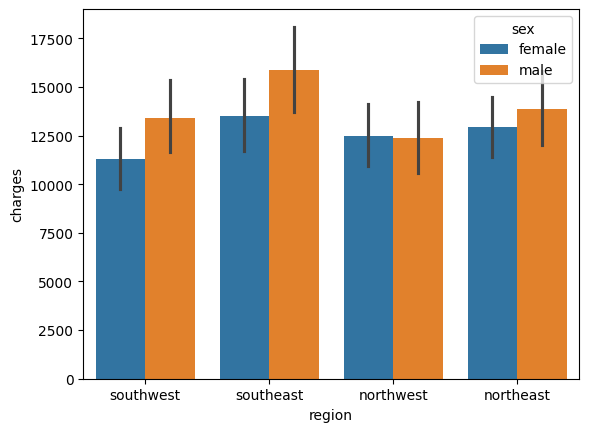

In [12]:
sns.barplot(x='region', y='charges', hue='sex', data=df)


Após a análise descritiva e inferencial foi possível observar que características como fumo, sexo e região são importantes para classificar os níveis de taxas do seguro saúde.

Agora, vamos iniciar a transformação das variáveis para treinar um modelo de árvore de decisão.

O problema a ser solucionado será: Quais características vão me levar a ter uma alta taxa de cobrança de seguro saúde?

1. Tratamento da variável target: Charges

<Axes: xlabel='charges', ylabel='Count'>

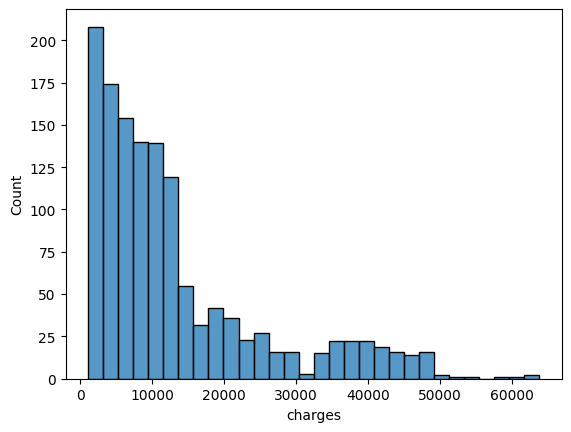

In [13]:
# Verificação da distribuição

sns.histplot(x='charges', data= df)

In [14]:
#Definindo um ponto de corte para dividir 'Charges' em alta e baixa

limite= df['charges'].median()

df['taxa_categoria'] = df['charges'].apply(lambda x: 'Alta' if x > limite else 'Baixa')

#Verificação da transformação:

print(df['taxa_categoria'].value_counts())


taxa_categoria
Alta     669
Baixa    669
Name: count, dtype: int64


In [15]:
#Transformação das variávei categóricas em 0 e 1

lb = LabelEncoder()

# Iterando sobre as colunas categóricas e aplicando LabelEncoder
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':  # Se for categórico
        df[col] = lb.fit_transform(df[col])

print(df)

      age  sex     bmi  children  smoker  region      charges  taxa_categoria
0      19    0  27.900         0       1       3  16884.92400               0
1      18    1  33.770         1       0       2   1725.55230               1
2      28    1  33.000         3       0       2   4449.46200               1
3      33    1  22.705         0       0       1  21984.47061               0
4      32    1  28.880         0       0       1   3866.85520               1
...   ...  ...     ...       ...     ...     ...          ...             ...
1333   50    1  30.970         3       0       1  10600.54830               0
1334   18    0  31.920         0       0       0   2205.98080               1
1335   18    0  36.850         0       0       2   1629.83350               1
1336   21    0  25.800         0       0       3   2007.94500               1
1337   61    0  29.070         0       1       1  29141.36030               0

[1338 rows x 8 columns]


In [16]:
#Balanceamento das variáveis

      #Sepaação do dataset


PREDITORAS = df.iloc[:, :6]


TARGET= df.iloc[:, 7]

print(PREDITORAS)

print(TARGET)

#Balanceamento

seed= 100

balanceador = SMOTE(random_state=seed)

PREDITORAS_RES,TARGET_RES = balanceador.fit_resample(PREDITORAS,TARGET)


      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       0
1       1
2       1
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    1
1337    0
Name: taxa_categoria, Length: 1338, dtype: int64


In [17]:
#Divisão dos dados de treino e teste

X_treino, X_teste,Y_treino, Y_teste = train_test_split(PREDITORAS_RES, TARGET_RES, test_size=30, random_state=42)

In [18]:
#Setando as configurações necessárias para o modelo

randomForest = RandomForestClassifier()

randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [19]:
max_depth = np.array([10,20])
criterion = np.array (['gini', 'entropy'])
min_samples_split = np.array([1,2,5])
min_samples_leaf = np.array ([1,2,3])

In [20]:
grid_parametros= dict(max_depth = max_depth,
                      criterion = criterion,
                      min_samples_split = min_samples_split,
                      min_samples_leaf = min_samples_leaf)

randomForest = GridSearchCV(randomForest, grid_parametros, cv=3, n_jobs=8)

randomForest.fit(X_treino, Y_treino)

# Obtendo e visualizando os parametros treinados
treinos_rf = pd.DataFrame(randomForest.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {randomForest.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {randomForest.best_params_}")
print("")
print("Numero de treinamentos realizados: ", treinos_rf.shape[0])

c:\Users\Fifi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Fifi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Fifi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Fifi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", 

Acurácia em Treinamento: 93.81%

Hiperparâmetros Ideais: {'criterion': np.str_('entropy'), 'max_depth': np.int64(10), 'min_samples_leaf': np.int64(2), 'min_samples_split': np.int64(2)}

Numero de treinamentos realizados:  36


In [21]:
#Criação do modelo e de seu objeto

clf = RandomForestClassifier(n_estimators  = 100, criterion = 'entropy', max_depth = 10, 
                            min_samples_leaf = 3, min_samples_split = 2, n_jobs = 8)

# Construção do modelo
clf = clf.fit(X_treino, Y_treino)

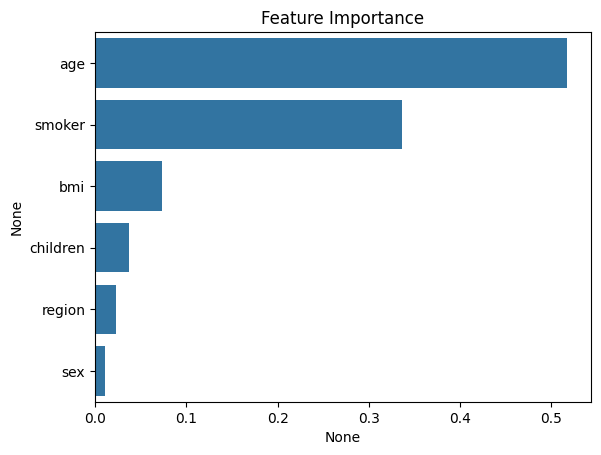

In [22]:
#Grau de importancia das variáveis para a arvore de decisão

fi = pd.Series(data=clf.feature_importances_, index=PREDITORAS.columns)
fi = fi.sort_values(ascending = False)
sns.barplot(x=fi, y=fi.index, orient='h').set_title('Feature Importance')
plt.show()

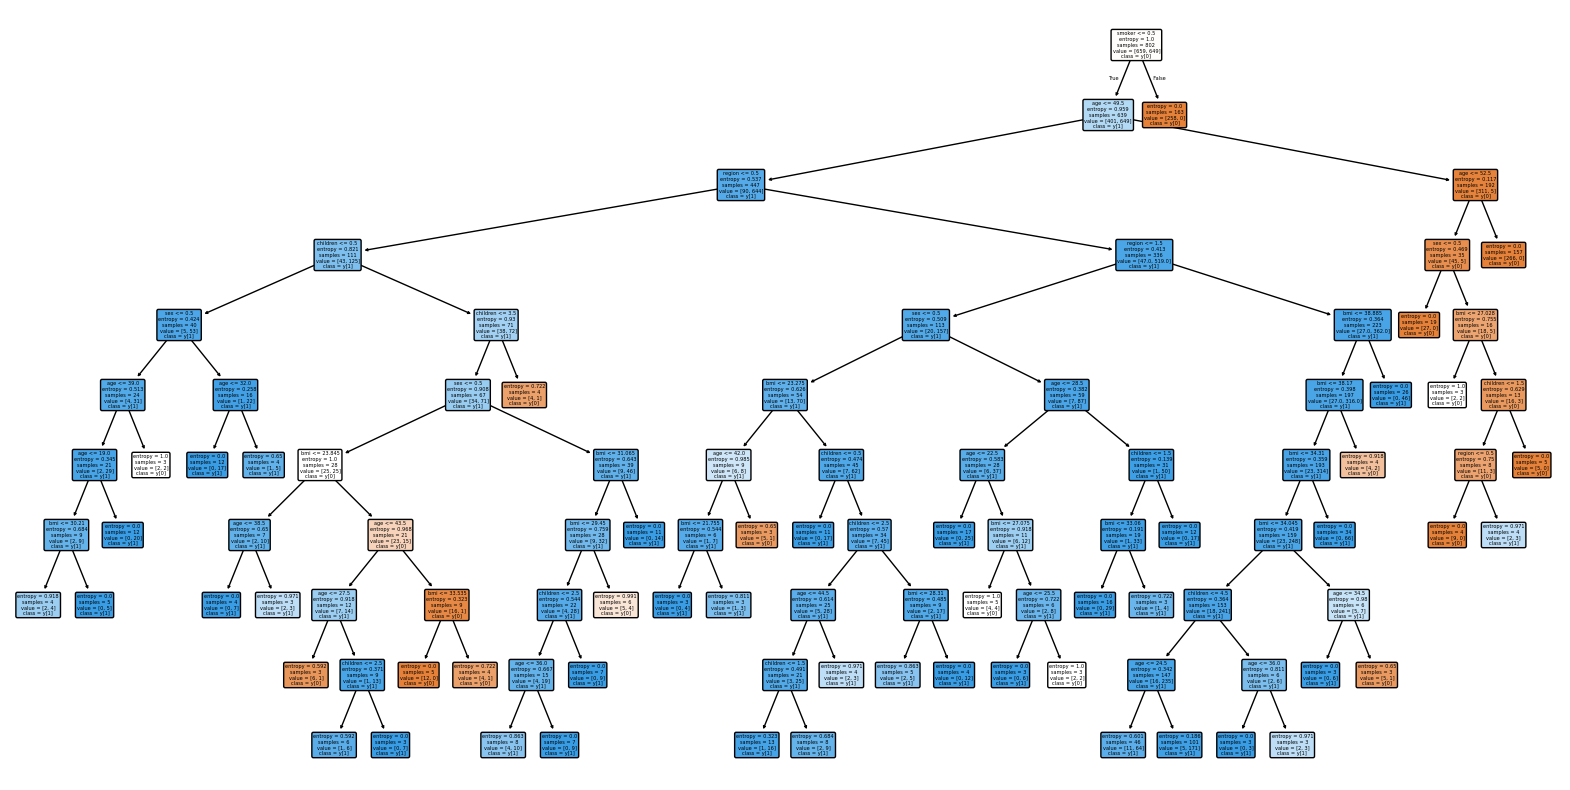

In [32]:
#visualização da árvore

# Selecionando a primeira árvore
estimator = clf.estimators_[0]

# Plotando a árvore
plt.figure(figsize=(20,10))
plot_tree(estimator, feature_names=X_treino.columns, filled=True, rounded=True, class_names=True)
plt.savefig("arvore_decisao.png", dpi=300)
plt.show()



In [127]:
#Escrita dos resultados

modelo_rf = {'Hiperparametros':randomForest.best_params_,
               'Qtd Modelos Treinados': treinos_rf.shape[0],  
               'Melhor Score': str(round(randomForest.best_score_ * 100,2))+"%"}

modelo_rf

{'Hiperparametros': {'criterion': np.str_('entropy'),
  'max_depth': np.int64(10),
  'min_samples_leaf': np.int64(3),
  'min_samples_split': np.int64(2)},
 'Qtd Modelos Treinados': 36,
 'Melhor Score': '93.65%'}

In [37]:
scores = clf.score(X_teste,Y_teste)
scores

0.9666666666666667

In [38]:
print(X_teste)

      age  sex     bmi  children  smoker  region
764    45    0  25.175         2       0       0
887    36    0  30.020         0       0       1
890    64    0  26.885         0       1       1
1293   46    1  25.745         3       0       1
259    19    1  31.920         0       1       1
1312   34    1  42.900         1       0       3
899    19    0  22.515         0       0       1
752    64    1  37.905         0       0       1
1286   28    0  17.290         0       0       0
707    49    1  28.690         3       0       1
780    30    1  24.400         3       1       3
567    41    1  30.590         2       0       1
76     29    0  29.590         1       0       2
265    46    1  42.350         3       1       2
901    60    1  40.920         0       1       2
893    47    1  38.940         2       1       2
650    49    0  42.680         2       0       2
615    47    0  36.630         1       1       2
538    46    0  28.050         1       0       2
916    43    0  26.8

In [39]:
#Dados de teste

# Novo dado de input manual (valores correspondentes às colunas do dataset original)
novo_input = [[27,1, 30.2,0,1, 2]]

# Colocando em dataframe
novo_input_df = pd.DataFrame(novo_input, columns=X_treino.columns)

# Fazendo a previsão com o modelo treinado
previsao = randomForest.predict(novo_input_df)

# Exibindo o resultado da previsão
print(f"A previsão da árvore de decisão para esse input é: {previsao[0]}")

A previsão da árvore de decisão para esse input é: 0
